# Time series of CO2, T2m, GrIS area, MB, SMB and SEB

Author: Ziqi Yin

Last modified: 2024 Feb 15

Table of contents:
* [Time series of (a) CO2 forcing, (b) average 2m air temperature, (c) GrIS area, ablation zone area, (d) MB and its components, (e) SMB and its components, (f) SEB and its components' anomalies.](#first-bullet)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import numpy.ma as ma
import matplotlib.colors as colors
from statistics import mode
import pandas as pd
from scipy import signal
from cartopy.util import add_cyclic_point
from scipy import interpolate
import glob
from scipy import stats

home_dir = '/glade/work/ziqiyin/'
import sys  
sys.path.insert(0, home_dir)
sys.path.append(home_dir + 'function/')

from functions import *

crs_np = ccrs.NorthPolarStereo(central_longitude=0)
crs_ll = ccrs.PlateCarree()

# For unstructured grid
import warnings
warnings.filterwarnings('ignore')
from matplotlib.collections import PolyCollection

# For regridding
import os
import ESMF
import xesmf as xe

## 1. Time series plot <a class="anchor" id="first-bullet"></a>

### Read data

#### piControl

In [2]:
# T2m
ARCTIC_piControl_p4_TREFHT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_TREFHT_piControl_p4_yearly.nc')['TREFHT']

# MB
ARCTIC_int_piControl_p4_ivol = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_ivol_piControl_p4.nc')['ivol']

f09_int_piControl_ivol = xr.open_dataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-piControl-withism.001/glc/proc/tseries/year_1/b.e21.B1850G.f09_g17_gl4.CMIP6-piControl-withism.001.cism.h.ivol.0001-0301.nc')['ivol'][1:]
f09_int_piControl_imass = xr.open_dataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-piControl-withism.001/glc/proc/tseries/year_1/b.e21.B1850G.f09_g17_gl4.CMIP6-piControl-withism.001.cism.h.imass.0001-0301.nc')['imass'][1:]

# SEB
ARCTIC_piControl_p4_FSA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSA_piControl_p4_JJA.nc')['FSA'] 
ARCTIC_piControl_p4_FSR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSR_piControl_p4_JJA.nc')['FSR'] 
ARCTIC_piControl_p4_FIRA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRA_piControl_p4_JJA.nc')['FIRA'] 
ARCTIC_piControl_p4_FLDS_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FLDS_piControl_p4_JJA.nc')['FLDS'] 
ARCTIC_piControl_p4_FIRE_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRE_piControl_p4_JJA.nc')['FIRE']
ARCTIC_piControl_p4_FSM_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSM_piControl_p4_JJA.nc')['FSM']
ARCTIC_piControl_p4_FGR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FGR_piControl_p4_JJA.nc')['FGR']
ARCTIC_piControl_p4_FSH_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSH_piControl_p4_JJA.nc')['FSH']
ARCTIC_piControl_p4_EFLX_LH_TOT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_EFLX_LH_TOT_piControl_p4_JJA.nc')['EFLX_LH_TOT']
ARCTIC_piControl_p4_FICE_MELT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QICE_MELT_piControl_p4_JJA.nc')['QICE_MELT'] * 3.34e5 #[W/m2]

#### 1pctCO2

In [3]:
# T2m
ARCTIC_1pctCO2_TREFHT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_TREFHT_1pctCO2_yearly.nc')['TREFHT']

# MB
ARCTIC_int_1pctCO2_smb = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_smb_flux_1pctCO2.nc')['total_smb_flux']
ARCTIC_int_1pctCO2_id = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_calving_flux_1pctCO2.nc')['total_calving_flux']
ARCTIC_int_1pctCO2_bmb = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_bmb_flux_1pctCO2.nc')['total_bmb_flux']
ARCTIC_int_1pctCO2_ivol = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_ivol_1pctCO2.nc')['ivol']

f09_int_1pctCO2_ivol = xr.open_dataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001/glc/proc/tseries/year_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001.cism.h.ivol.0001-0161.nc')['ivol'][1:]

# SMB
ARCTIC_1pctCO2_RAIN_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_RAIN_1pctCO2_yearly.nc')['RAIN'] 
ARCTIC_1pctCO2_SNOW_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_SNOW_1pctCO2_yearly.nc')['SNOW'] 
ARCTIC_1pctCO2_PRECC_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PRECC_1pctCO2_yearly.nc')['PRECC'] 
ARCTIC_1pctCO2_PRECL_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PRECL_1pctCO2_yearly.nc')['PRECL'] 
ARCTIC_1pctCO2_QICE_MELT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QICE_MELT_1pctCO2_yearly.nc')['QICE_MELT'] 
ARCTIC_1pctCO2_QSNOMELT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QSNOMELT_1pctCO2_yearly.nc')['QSNOMELT']
ARCTIC_1pctCO2_QFLX_EVAP_TOT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QFLX_EVAP_TOT_1pctCO2_yearly.nc')['QFLX_EVAP_TOT']
ARCTIC_1pctCO2_QRUNOFF_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QRUNOFF_1pctCO2_yearly.nc')['QRUNOFF']

# SEB
ARCTIC_1pctCO2_FSDS_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSDS_1pctCO2_JJA.nc')['FSDS'] 
ARCTIC_1pctCO2_FSA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSA_1pctCO2_JJA.nc')['FSA'] 
ARCTIC_1pctCO2_FSR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSR_1pctCO2_JJA.nc')['FSR'] 
ARCTIC_1pctCO2_FIRA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRA_1pctCO2_JJA.nc')['FIRA'] 
ARCTIC_1pctCO2_FLDS_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FLDS_1pctCO2_JJA.nc')['FLDS'] 
ARCTIC_1pctCO2_FIRE_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRE_1pctCO2_JJA.nc')['FIRE']
ARCTIC_1pctCO2_FSM_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSM_1pctCO2_JJA.nc')['FSM']
ARCTIC_1pctCO2_FGR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FGR_1pctCO2_JJA.nc')['FGR']
ARCTIC_1pctCO2_FSH_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSH_1pctCO2_JJA.nc')['FSH']
ARCTIC_1pctCO2_EFLX_LH_TOT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_EFLX_LH_TOT_1pctCO2_JJA.nc')['EFLX_LH_TOT']
ARCTIC_1pctCO2_FICE_MELT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QICE_MELT_1pctCO2_JJA.nc')['QICE_MELT'] * 3.34e5 #[W/m2]

#### 4xext

In [4]:
# T2m
ARCTIC_4xext_TREFHT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_TREFHT_4xext_yearly.nc')['TREFHT']

# MB
length = 210

ARCTIC_int_4xext_smb = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_smb_flux_4xext.nc')['total_smb_flux'][:length]
ARCTIC_int_4xext_id = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_calving_flux_4xext.nc')['total_calving_flux'][:length]
ARCTIC_int_4xext_bmb = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_total_bmb_flux_4xext.nc')['total_bmb_flux'][:length]
ARCTIC_int_4xext_ivol = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_ivol_4xext.nc')['ivol'][:length]

# SMB
ARCTIC_4xext_RAIN_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_RAIN_4xext_yearly.nc')['RAIN'][:length]
ARCTIC_4xext_SNOW_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_SNOW_4xext_yearly.nc')['SNOW'][:length]
ARCTIC_4xext_QICE_MELT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QICE_MELT_4xext_yearly.nc')['QICE_MELT'][:length]
ARCTIC_4xext_QSNOMELT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QSNOMELT_4xext_yearly.nc')['QSNOMELT'][:length]
ARCTIC_4xext_QFLX_EVAP_TOT_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QFLX_EVAP_TOT_4xext_yearly.nc')['QFLX_EVAP_TOT'][:length]
ARCTIC_4xext_QRUNOFF_yearly = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QRUNOFF_4xext_yearly.nc')['QRUNOFF'][:length]

# SEB
ARCTIC_4xext_FSDS_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSDS_4xext_JJA.nc')['FSDS'][:length] 
ARCTIC_4xext_FSA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSA_4xext_JJA.nc')['FSA'][:length] 
ARCTIC_4xext_FSR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSR_4xext_JJA.nc')['FSR'][:length] 
ARCTIC_4xext_FIRA_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRA_4xext_JJA.nc')['FIRA'][:length] 
ARCTIC_4xext_FLDS_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FLDS_4xext_JJA.nc')['FLDS'][:length] 
ARCTIC_4xext_FIRE_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FIRE_4xext_JJA.nc')['FIRE'][:length]
ARCTIC_4xext_FSM_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSM_4xext_JJA.nc')['FSM'][:length]
ARCTIC_4xext_FGR_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FGR_4xext_JJA.nc')['FGR'][:length]
ARCTIC_4xext_FSH_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_FSH_4xext_JJA.nc')['FSH'][:length]
ARCTIC_4xext_EFLX_LH_TOT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_EFLX_LH_TOT_4xext_JJA.nc')['EFLX_LH_TOT'][:length]
ARCTIC_4xext_FICE_MELT_JJA = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_QICE_MELT_4xext_JJA.nc')['QICE_MELT'][:length] * 3.34e5 #[W/m2]

In [5]:
## Combine
# T2m
ARCTIC_1pctCO2_4xext_TREFHT_yearly = xr.concat([ARCTIC_1pctCO2_TREFHT_yearly, ARCTIC_4xext_TREFHT_yearly], dim='time')

# MB
ARCTIC_int_1pctCO2_4xext_smb = xr.concat([ARCTIC_int_1pctCO2_smb, ARCTIC_int_4xext_smb], dim='time')
ARCTIC_int_1pctCO2_4xext_id = xr.concat([ARCTIC_int_1pctCO2_id, ARCTIC_int_4xext_id], dim='time')
ARCTIC_int_1pctCO2_4xext_bmb = xr.concat([ARCTIC_int_1pctCO2_bmb, ARCTIC_int_4xext_bmb], dim='time')

f09_int_4xext_ivol_first = xr.open_dataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2-4xext.001/glc/proc/tseries/year_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2-4xext.001.cism.h.ivol.0142-0191.nc')['ivol'][:]
f09_int_4xext_ivol_last = xr.open_dataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2-4xext.001/glc/proc/tseries/year_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2-4xext.001.cism.h.ivol.0342-0351.nc')['ivol'][:]

# SMB
ARCTIC_1pctCO2_4xext_RAIN_yearly = xr.concat([ARCTIC_1pctCO2_RAIN_yearly, ARCTIC_4xext_RAIN_yearly], dim='time')
ARCTIC_1pctCO2_4xext_SNOW_yearly = xr.concat([ARCTIC_1pctCO2_SNOW_yearly, ARCTIC_4xext_SNOW_yearly], dim='time')
ARCTIC_1pctCO2_4xext_QICE_MELT_yearly = xr.concat([ARCTIC_1pctCO2_QICE_MELT_yearly, ARCTIC_4xext_QICE_MELT_yearly], dim='time')
ARCTIC_1pctCO2_4xext_QSNOMELT_yearly = xr.concat([ARCTIC_1pctCO2_QSNOMELT_yearly, ARCTIC_4xext_QSNOMELT_yearly], dim='time')
ARCTIC_1pctCO2_4xext_QFLX_EVAP_TOT_yearly = xr.concat([ARCTIC_1pctCO2_QFLX_EVAP_TOT_yearly, ARCTIC_4xext_QFLX_EVAP_TOT_yearly], dim='time')
ARCTIC_1pctCO2_4xext_QRUNOFF_yearly = xr.concat([ARCTIC_1pctCO2_QRUNOFF_yearly, ARCTIC_4xext_QRUNOFF_yearly], dim='time')

# SEB
ARCTIC_1pctCO2_4xext_FSDS_JJA = xr.concat([ARCTIC_1pctCO2_FSDS_JJA, ARCTIC_4xext_FSDS_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FSA_JJA = xr.concat([ARCTIC_1pctCO2_FSA_JJA, ARCTIC_4xext_FSA_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FSR_JJA = xr.concat([ARCTIC_1pctCO2_FSR_JJA, ARCTIC_4xext_FSR_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FIRA_JJA = xr.concat([ARCTIC_1pctCO2_FIRA_JJA, ARCTIC_4xext_FIRA_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FLDS_JJA = xr.concat([ARCTIC_1pctCO2_FLDS_JJA, ARCTIC_4xext_FLDS_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FIRE_JJA = xr.concat([ARCTIC_1pctCO2_FIRE_JJA, ARCTIC_4xext_FIRE_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FSM_JJA = xr.concat([ARCTIC_1pctCO2_FSM_JJA, ARCTIC_4xext_FSM_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FGR_JJA = xr.concat([ARCTIC_1pctCO2_FGR_JJA, ARCTIC_4xext_FGR_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FSH_JJA = xr.concat([ARCTIC_1pctCO2_FSH_JJA, ARCTIC_4xext_FSH_JJA], dim='time')
ARCTIC_1pctCO2_4xext_EFLX_LH_TOT_JJA = xr.concat([ARCTIC_1pctCO2_EFLX_LH_TOT_JJA, ARCTIC_4xext_EFLX_LH_TOT_JJA], dim='time')
ARCTIC_1pctCO2_4xext_FICE_MELT_JJA = xr.concat([ARCTIC_1pctCO2_FICE_MELT_JJA, ARCTIC_4xext_FICE_MELT_JJA], dim='time')

#### Area

In [6]:
Re = 6371.22 * 1e3 #[m]

f09_mask_file3 = '/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.fv0.9x1.25_gx1v7.151020.nc'
f09_area = xr.open_dataset(f09_mask_file3)['area'] #[Radian2]
f09_area_Arctic = f09_area.where(f09_area.yc > 60).values * Re**2
f09_area = f09_area.values * Re**2

ARCTIC_mask_file3 = '/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.ne0np4.ARCTIC.ne30x4_tx0.1v2.200626.nc'
ARCTIC_area = xr.open_dataset(ARCTIC_mask_file3)['area'] #[Radian2]
ARCTIC_area_Arctic = ARCTIC_area.where(ARCTIC_area.yc > 60).values * Re**2
ARCTIC_area = ARCTIC_area.values * Re**2

ARCTIC_lat = xr.open_dataset(ARCTIC_mask_file3).yc[0,:].values

#### Mask

In [7]:
# ARCTIC
# Generate Greenland mask
ARCTIC_mask_file1 = '/glade/work/aherring/grids/var-res/ne0np4.ARCTIC.ne30x4/clm_surfdata_5_0/surfdata_ne0np4.ARCTIC.ne30x4_hist_78pfts_CMIP6_simyr1850_c200426.nc'
ARCTIC_GrIS_mask0 = xr.open_dataset(ARCTIC_mask_file1)['GLACIER_REGION']
ARCTIC_GrIS_mask0 = xr.where(ARCTIC_GrIS_mask0==2, 1, np.nan)
# Glacier fraction of land area
ARCTIC_glacier_frac_piControl_p1 = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_piControl_p1_yearly.nc')['PCT_LANDUNIT'][:,3,:]
ARCTIC_glacier_frac_piControl_p2 = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_piControl_p2_yearly.nc')['PCT_LANDUNIT'][:,3,:]
ARCTIC_glacier_frac_piControl_p3 = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_piControl_p3_yearly.nc')['PCT_LANDUNIT'][:,3,:]
ARCTIC_glacier_frac_piControl_p4 = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_piControl_p4_yearly.nc')['PCT_LANDUNIT'][:,3,:]
ARCTIC_glacier_frac_piControl = xr.concat([ARCTIC_glacier_frac_piControl_p1, ARCTIC_glacier_frac_piControl_p2, ARCTIC_glacier_frac_piControl_p3, ARCTIC_glacier_frac_piControl_p4], dim='time')
ARCTIC_mask_file2 = '/glade/campaign/cgd/amp/aherring/archive/cam6_2_022.se_FHIST_ne0np4.ARCTIC.ne30x4_mt12_7680pes_200507_mg3-Nx2yrs/lnd/hist/cam6_2_022.se_FHIST_ne0np4.ARCTIC.ne30x4_mt12_7680pes_200507_mg3-Nx2yrs.clm2.h0.1979-01.nc'
ARCTIC_glacier_frac_const = xr.open_dataset(ARCTIC_mask_file2)['PCT_LANDUNIT'][0,3,:]
ARCTIC_glacier_frac_1pctCO2 = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_1pctCO2_yearly.nc')['PCT_LANDUNIT'][:,3,:]
ARCTIC_glacier_frac_4xext = xr.open_dataset(home_dir+'dynamic_GrIS/arctic/ARCTIC_PCT_LANDUNIT_4xext_yearly.nc')['PCT_LANDUNIT'][:length,3,:]
ARCTIC_glacier_frac = xr.concat([ARCTIC_glacier_frac_1pctCO2, ARCTIC_glacier_frac_4xext], dim='time')
# Land fraction of grid cell
ARCTIC_mask_file3 = '/glade/campaign/cesm/development/amwg/aherring/cesm2_2_alpha06d.poparctic_B1850G1PCT_ne0ARCTICne30x4_g17_8192pes_220705_Nx2yrs.001/lnd/hist/cesm2_2_alpha06d.poparctic_B1850G1PCT_ne0ARCTICne30x4_g17_8192pes_220705_Nx2yrs.001.clm2.h0.0001-01.nc' #directly from clm2.h0 files
ARCTIC_land_frac = xr.open_dataset(ARCTIC_mask_file3)['landfrac']
ARCTIC_GrIS_mask_piControl = ARCTIC_GrIS_mask0.values * ARCTIC_glacier_frac_piControl.values * ARCTIC_land_frac.values / 100
ARCTIC_GrIS_mask_const = ARCTIC_GrIS_mask0.values * ARCTIC_glacier_frac_const.values * ARCTIC_land_frac.values / 100
ARCTIC_GrIS_mask = ARCTIC_GrIS_mask0.values * ARCTIC_glacier_frac.values * ARCTIC_land_frac.values / 100

f09_mask_file3 = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001/lnd/proc/tseries/month_1/b.e21.B1850G.f09_g17_gl4.CMIP6-1pctCO2to4x-withism.001.clm2.h0.RAIN.000101-005012.nc'
f09_land_frac = xr.open_dataset(f09_mask_file3)['landfrac'] #fraction of grid cell that is active

### Calculate

In [8]:
#-------------------- CO2 forcing --------------------
co2_forcing_1pctCO2 = np.zeros(141)
co2_forcing_1pctCO2[0] = 284.7

for i in range(1,141):
    co2_forcing_1pctCO2[i] = co2_forcing_1pctCO2[i-1] * 1.01

co2_forcing_4xext = np.zeros(210) + co2_forcing_1pctCO2[-1]
co2_foring_1pctCO2_4xext = np.concatenate((co2_forcing_1pctCO2[1:], co2_forcing_4xext), axis=0)

#-------------------- TREFHT --------------------
# Global
ARCTIC_int_piControl4_TREFHT = (ARCTIC_piControl_p4_TREFHT_yearly * ARCTIC_area).sum(dim=['ncol']) / np.sum(ARCTIC_area) - 273.15
ARCTIC_int_1pctCO2_4xext_TREFHT = (ARCTIC_1pctCO2_4xext_TREFHT_yearly * ARCTIC_area).sum(dim=['ncol']) / np.sum(ARCTIC_area) - 273.15
# Arctic
ARCTIC_int_piControl4_TREFHT_Arctic = (ARCTIC_piControl_p4_TREFHT_yearly.where(ARCTIC_lat > 60) * ARCTIC_area_Arctic).sum(dim=['ncol']) / np.nansum(ARCTIC_area_Arctic) - 273.15
ARCTIC_int_1pctCO2_4xext_TREFHT_Arctic = (ARCTIC_1pctCO2_4xext_TREFHT_yearly.where(ARCTIC_lat > 60) * ARCTIC_area_Arctic).sum(dim=['ncol']) / np.nansum(ARCTIC_area_Arctic) - 273.15
# GrIS
ARCTIC_int_piControl4_TREFHT_GrIS = (ARCTIC_piControl_p4_TREFHT_yearly * ARCTIC_GrIS_mask_piControl[100:,:] * ARCTIC_area).sum(dim=['ncol']) / np.nansum(ARCTIC_area * ARCTIC_GrIS_mask_piControl[100:,:],axis=1) - 273.15
ARCTIC_int_1pctCO2_4xext_TREFHT_GrIS = (ARCTIC_1pctCO2_4xext_TREFHT_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['ncol']) / np.nansum(ARCTIC_area * ARCTIC_GrIS_mask,axis=1) - 273.15

# average of piControl
ARCTIC_int_piControl_TREFHT_avg = ARCTIC_int_piControl4_TREFHT[-20:].mean(dim='time')
ARCTIC_int_piControl_TREFHT_Arctic_avg = ARCTIC_int_piControl4_TREFHT_Arctic[-20:].mean(dim='time')
ARCTIC_int_piControl_TREFHT_GrIS_avg = ARCTIC_int_piControl4_TREFHT_GrIS[-20:].mean(dim='time')

#-------------------- area --------------------
ARCTIC_1pctCO2_4xext_smb_yearly = ARCTIC_1pctCO2_4xext_RAIN_yearly + ARCTIC_1pctCO2_4xext_SNOW_yearly - ARCTIC_1pctCO2_4xext_QRUNOFF_yearly - ARCTIC_1pctCO2_4xext_QFLX_EVAP_TOT_yearly
ARCTIC_int_1pctCO2_4xext_GrIS_area = np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_int_1pctCO2_4xext_GrIS_area_rm = xr.DataArray(ARCTIC_int_1pctCO2_4xext_GrIS_area).rolling(dim_0=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_GrIS_ablation_area = xr.DataArray(ARCTIC_GrIS_mask * ARCTIC_area).where(ARCTIC_1pctCO2_4xext_smb_yearly.values<0).sum(axis=1)
ARCTIC_int_1pctCO2_4xext_GrIS_ablation_pct = ARCTIC_int_1pctCO2_4xext_GrIS_ablation_area / ARCTIC_int_1pctCO2_4xext_GrIS_area * 100
ARCTIC_int_1pctCO2_4xext_GrIS_ablation_pct_rm = ARCTIC_int_1pctCO2_4xext_GrIS_ablation_pct.rolling(dim_0=20, center=True, min_periods=2).mean()

#-------------------- MB --------------------
ARCTIC_int_1pctCO2_4xext_mb = ARCTIC_int_1pctCO2_4xext_smb + ARCTIC_int_1pctCO2_4xext_id + ARCTIC_int_1pctCO2_4xext_bmb

# running mean
ARCTIC_int_1pctCO2_4xext_bmb_rm = ARCTIC_int_1pctCO2_4xext_bmb.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_id_rm = ARCTIC_int_1pctCO2_4xext_id.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_smb_rm = ARCTIC_int_1pctCO2_4xext_smb.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_mb_rm = ARCTIC_int_1pctCO2_4xext_mb.rolling(time=20, center=True, min_periods=2).mean()

#-------------------- SMB --------------------
ARCTIC_int_1pctCO2_4xext_RAIN = (ARCTIC_1pctCO2_4xext_RAIN_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_SNOW = (ARCTIC_1pctCO2_4xext_SNOW_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_QICE_MELT = (ARCTIC_1pctCO2_4xext_QICE_MELT_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_QSNOMELT = (ARCTIC_1pctCO2_4xext_QSNOMELT_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT = (ARCTIC_1pctCO2_4xext_QFLX_EVAP_TOT_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_QRUNOFF = (ARCTIC_1pctCO2_4xext_QRUNOFF_yearly * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid'])
ARCTIC_int_1pctCO2_4xext_QRF = ARCTIC_int_1pctCO2_4xext_RAIN + ARCTIC_int_1pctCO2_4xext_QICE_MELT + ARCTIC_int_1pctCO2_4xext_QSNOMELT - ARCTIC_int_1pctCO2_4xext_QRUNOFF
ARCTIC_int_1pctCO2_4xext_smb_lnd = ARCTIC_int_1pctCO2_4xext_RAIN + ARCTIC_int_1pctCO2_4xext_SNOW - ARCTIC_int_1pctCO2_4xext_QRUNOFF - ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT

# running mean
ARCTIC_int_1pctCO2_4xext_RAIN_rm = ARCTIC_int_1pctCO2_4xext_RAIN.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_SNOW_rm = ARCTIC_int_1pctCO2_4xext_SNOW.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_QICE_MELT_rm = ARCTIC_int_1pctCO2_4xext_QICE_MELT.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_QSNOMELT_rm = ARCTIC_int_1pctCO2_4xext_QSNOMELT.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT_rm = ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_QRUNOFF_rm = ARCTIC_int_1pctCO2_4xext_QRUNOFF.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_QRF_rm = ARCTIC_int_1pctCO2_4xext_QRF.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_int_1pctCO2_4xext_smb_lnd_rm = ARCTIC_int_1pctCO2_4xext_smb_lnd.rolling(time=20, center=True, min_periods=2).mean()

#-------------------- SEB --------------------
# mean value of the last 20 years of piControl
ARCTIC_piControlend_FSA_JJA_mean = ARCTIC_piControl_p4_FSA_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_FIRA_JJA_mean = ARCTIC_piControl_p4_FIRA_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_FSM_JJA_mean = ARCTIC_piControl_p4_FSM_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_FGR_JJA_mean = ARCTIC_piControl_p4_FGR_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_FSH_JJA_mean = ARCTIC_piControl_p4_FSH_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_EFLX_LH_TOT_JJA_mean = ARCTIC_piControl_p4_EFLX_LH_TOT_JJA[-20:,:].mean(dim='time')
ARCTIC_piControlend_FICE_MELT_JJA_mean = ARCTIC_piControl_p4_FICE_MELT_JJA[-20:,:].mean(dim='time')

# Anomaly
ARCTIC_1pctCO2_4xext_dFSA_JJA = ARCTIC_1pctCO2_4xext_FSA_JJA - ARCTIC_piControlend_FSA_JJA_mean
ARCTIC_1pctCO2_4xext_dFIRA_JJA = ARCTIC_1pctCO2_4xext_FIRA_JJA - ARCTIC_piControlend_FIRA_JJA_mean
ARCTIC_1pctCO2_4xext_dFSM_JJA = ARCTIC_1pctCO2_4xext_FSM_JJA - ARCTIC_piControlend_FSM_JJA_mean
ARCTIC_1pctCO2_4xext_dFGR_JJA = ARCTIC_1pctCO2_4xext_FGR_JJA - ARCTIC_piControlend_FGR_JJA_mean
ARCTIC_1pctCO2_4xext_dFSH_JJA = ARCTIC_1pctCO2_4xext_FSH_JJA - ARCTIC_piControlend_FSH_JJA_mean
ARCTIC_1pctCO2_4xext_dEFLX_LH_TOT_JJA = ARCTIC_1pctCO2_4xext_EFLX_LH_TOT_JJA - ARCTIC_piControlend_EFLX_LH_TOT_JJA_mean
ARCTIC_1pctCO2_4xext_dFICE_MELT_JJA = ARCTIC_1pctCO2_4xext_FICE_MELT_JJA - ARCTIC_piControlend_FICE_MELT_JJA_mean

ARCTIC_avg_1pctCO2_4xext_dFSA = (ARCTIC_1pctCO2_4xext_dFSA_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dFIRA = (ARCTIC_1pctCO2_4xext_dFIRA_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dFSM = (ARCTIC_1pctCO2_4xext_dFSM_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dFGR = (ARCTIC_1pctCO2_4xext_dFGR_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dFSH = (ARCTIC_1pctCO2_4xext_dFSH_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dEFLX_LH_TOT = (ARCTIC_1pctCO2_4xext_dEFLX_LH_TOT_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dFICE_MELT = (ARCTIC_1pctCO2_4xext_dFICE_MELT_JJA * ARCTIC_GrIS_mask * ARCTIC_area).sum(dim=['lndgrid']) /np.nansum(ARCTIC_GrIS_mask * ARCTIC_area, axis=1)
ARCTIC_avg_1pctCO2_4xext_dMHF = ARCTIC_avg_1pctCO2_4xext_dFSM + ARCTIC_avg_1pctCO2_4xext_dFICE_MELT 
ARCTIC_avg_1pctCO2_4xext_dGHF = ARCTIC_avg_1pctCO2_4xext_dFGR - ARCTIC_avg_1pctCO2_4xext_dMHF

# running mean
ARCTIC_avg_1pctCO2_4xext_dFSA_rm = ARCTIC_avg_1pctCO2_4xext_dFSA.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dFIRA_rm = ARCTIC_avg_1pctCO2_4xext_dFIRA.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dFSM_rm = ARCTIC_avg_1pctCO2_4xext_dFSM.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dFGR_rm = ARCTIC_avg_1pctCO2_4xext_dFGR.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dFSH_rm = ARCTIC_avg_1pctCO2_4xext_dFSH.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dEFLX_LH_TOT_rm = ARCTIC_avg_1pctCO2_4xext_dEFLX_LH_TOT.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dMHF_rm = ARCTIC_avg_1pctCO2_4xext_dMHF.rolling(time=20, center=True, min_periods=2).mean()
ARCTIC_avg_1pctCO2_4xext_dGHF_rm = ARCTIC_avg_1pctCO2_4xext_dGHF.rolling(time=20, center=True, min_periods=2).mean()

In [10]:
# Mass loss rate
ARCTIC_int_1pctCO2_4xext_mb = ARCTIC_int_1pctCO2_4xext_smb + ARCTIC_int_1pctCO2_4xext_id + ARCTIC_int_1pctCO2_4xext_bmb
ARCTIC_int_1pctCO2_4xext_mb*(3600*24*365)/1e12

slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(1,111), ARCTIC_int_1pctCO2_4xext_mb[:110]*(3600*24*365)/1e12)  
print('yr 1-110: ', slope)

slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(111,151), ARCTIC_int_1pctCO2_4xext_mb[110:150]*(3600*24*365)/1e12)  
print('yr 111-150: ', slope)

yr 1-110:  -2.4075015610317334
yr 111-150:  -13.038150324431795


### Plot

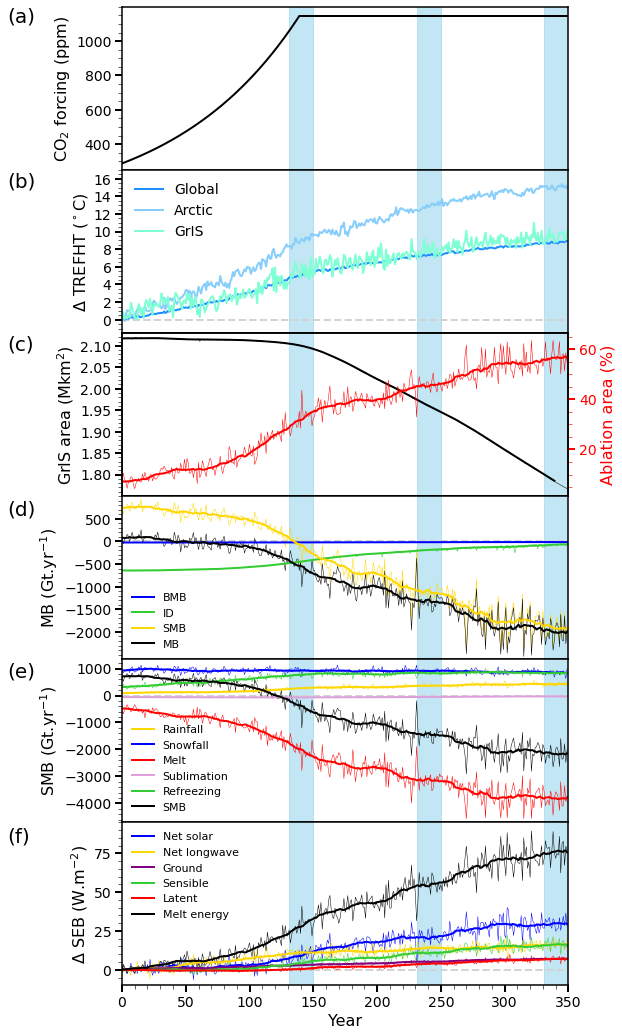

In [9]:
fig = plt.figure(figsize = (8,18))
gs=GridSpec(6,1)
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally

year_ARCTIC = np.arange(350)

#-------------------- CO2 forcing --------------------
ax1 = plt.subplot(gs[0])

ax1.axvspan(131, 150, alpha=0.5, color='skyblue')
ax1.axvspan(231, 250, alpha=0.5, color='skyblue')
ax1.axvspan(331, 350, alpha=0.5, color='skyblue')
ax1.plot(year_ARCTIC, co2_foring_1pctCO2_4xext, color = 'black', linewidth = 2)

ax1.set_xlim([0, 350])
ax1.set_ylim([250, 1200])
ax1.set_ylabel('$\mathregular{CO_2}$ forcing (ppm)', fontsize = 16)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='major', length=7, width=2)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(labelsize = 14)
ax1.set_yticks([400, 600, 800, 1000])
ax1.axes.get_xaxis().set_visible(False)

ax1.text(-90, 1110, '(a)', fontsize=20)

#------------------- TREFHT -------------------
ax2 = plt.subplot(gs[1])

ax2.axvspan(131, 150, alpha=0.5, color='skyblue')
ax2.axvspan(231, 250, alpha=0.5, color='skyblue')
ax2.axvspan(331, 350, alpha=0.5, color='skyblue')
ax2.hlines(y = 0, xmin = 0, xmax = 350, colors = 'lightgray', linestyles = '--', linewidth = 2)
ax2.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_TREFHT-ARCTIC_int_piControl_TREFHT_avg, color = 'dodgerblue', linewidth = 2, label = 'Global')
ax2.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_TREFHT_Arctic-ARCTIC_int_piControl_TREFHT_Arctic_avg, color = 'lightskyblue', linewidth = 2, label = 'Arctic')
ax2.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_TREFHT_GrIS-ARCTIC_int_piControl_TREFHT_GrIS_avg, color = 'aquamarine', linewidth = 2, label = 'GrIS')

ax2.set_xlim([0, 350])
ax2.set_ylim([-1.5, 17])
ax2.set_ylabel(r'$\Delta$ TREFHT ($\mathregular{^\circ}$C)', fontsize = 16)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='major', length=7, width=2)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(labelsize = 14)
ax2.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax2.axes.get_xaxis().set_visible(False)

ax2.legend(loc = 'best', frameon = False, prop={'size':14})

ax2.text(-90, 15.1, '(b)', fontsize=20)

#-------------------------------------------- area --------------------------------------------
ax3 = plt.subplot(gs[2])

ax3.axvspan(131, 150, alpha=0.5, color='skyblue')
ax3.axvspan(231, 250, alpha=0.5, color='skyblue')
ax3.axvspan(331, 350, alpha=0.5, color='skyblue')
ax3.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_GrIS_area/1e12, color='black', linewidth = 0.5)
ax3.plot(year_ARCTIC[:-10], ARCTIC_int_1pctCO2_4xext_GrIS_area_rm[:-10]/1e12, color='black', linewidth = 2)
ax3b=ax3.twinx()
ax3b.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_GrIS_ablation_pct, color='red', linewidth = 0.5)
ax3b.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_GrIS_ablation_pct_rm, color='red', linewidth = 2)

ax3.set_xlim([0, 350])
ax3.set_ylim([1.75, 2.13])
ax3.set_ylabel('GrIS area (M$\mathregular{km^{2}}$)', fontsize = 16)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.tick_params(which='major', length=7, width=2)
ax3.tick_params(which='minor', length=4)#, color='blue')
ax3.set_yticks([1.80, 1.85, 1.90, 1.95, 2.00, 2.05, 2.10])
ax3.tick_params(labelsize = 14)
ax3.axes.get_xaxis().set_visible(False)

ax3b.set_ylabel('Ablation area (%)', color='red', fontsize = 16)
ax3b.xaxis.set_minor_locator(AutoMinorLocator())
ax3b.yaxis.set_minor_locator(AutoMinorLocator())
ax3b.tick_params(which='major', length=7, width=2)
ax3b.tick_params(which='minor', length=4, color='red')
ax3b.tick_params(axis='y', colors='red')
ax3b.tick_params(labelsize = 14)
ax3b.axes.get_xaxis().set_visible(False)

ax3.text(-90, 2.09, '(c)', fontsize=20)

#-------------------------------------------- MB --------------------------------------------
ax4 = plt.subplot(gs[3])

ax4.axvspan(131, 150, alpha=0.5, color='skyblue')
ax4.axvspan(231, 250, alpha=0.5, color='skyblue')
ax4.axvspan(331, 350, alpha=0.5, color='skyblue')
ax4.hlines(y = 0, xmin = 0, xmax = 350, colors = 'lightgray', linestyles = '--', linewidth = 2)
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_bmb*(3600*24*365)/1e12, color = 'blue', linewidth = 0.5)
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_id*(3600*24*365)/1e12, color = 'limegreen', linewidth = 0.5)
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_smb*(3600*24*365)/1e12, color = 'gold', linewidth = 0.5)
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_mb*(3600*24*365)/1e12, color = 'black', linewidth = 0.5)
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_bmb_rm*(3600*24*365)/1e12, color = 'blue', linewidth = 2, label = 'BMB')
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_id_rm*(3600*24*365)/1e12, color = 'limegreen', linewidth = 2, label = 'ID')
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_smb_rm*(3600*24*365)/1e12, color = 'gold', linewidth = 2, label = 'SMB')
ax4.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_mb_rm*(3600*24*365)/1e12, color = 'black', linewidth = 2, label = 'MB')

ax4.set_xlim([0, 350])
ax4.set_ylim([-2600, 1000])
ax4.set_ylabel('MB (Gt.$\mathregular{yr^{-1}}$)', fontsize = 16)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.tick_params(which='major', length=7, width=2)
ax4.tick_params(which='minor', length=4)
ax4.set_yticks([-2000, -1500, -1000, -500, 0, 500])
ax4.tick_params(labelsize = 14)
ax4.axes.get_xaxis().set_visible(False)

ax4.legend(loc = 'best', frameon = False, prop={'size':11}, ncol=1)

ax4.text(-90, 580, '(d)', fontsize=20)

#-------------------------------------------- SMB --------------------------------------------
ax5 = plt.subplot(gs[4])

ax5.axvspan(131, 150, alpha=0.5, color='skyblue')
ax5.axvspan(231, 250, alpha=0.5, color='skyblue')
ax5.axvspan(331, 350, alpha=0.5, color='skyblue')
ax5.hlines(y = 0, xmin = 0, xmax = 350, colors = 'lightgray', linestyles = '--', linewidth = 2)
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_RAIN*(3600*24*365)/1e12, color = 'gold', linewidth = 0.5)
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_SNOW*(3600*24*365)/1e12, color = 'blue', linewidth = 0.5)
ax5.plot(year_ARCTIC, -(ARCTIC_int_1pctCO2_4xext_QICE_MELT+ARCTIC_int_1pctCO2_4xext_QSNOMELT)*(3600*24*365)/1e12, color = 'red', linewidth = 0.5)
ax5.plot(year_ARCTIC, -ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT*(3600*24*365)/1e12, color = 'plum', linewidth = 0.5)
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_QRF*(3600*24*365)/1e12, color = 'limegreen', linewidth = 0.5)
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_smb_lnd*(3600*24*365)/1e12, color = 'black', linewidth = 0.5)
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_RAIN_rm*(3600*24*365)/1e12, color = 'gold', linewidth = 2, label = 'Rainfall')
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_SNOW_rm*(3600*24*365)/1e12, color = 'blue', linewidth = 2, label = 'Snowfall')
ax5.plot(year_ARCTIC, -(ARCTIC_int_1pctCO2_4xext_QICE_MELT_rm+ARCTIC_int_1pctCO2_4xext_QSNOMELT_rm)*(3600*24*365)/1e12, color = 'red', linewidth = 2, label = 'Melt')
ax5.plot(year_ARCTIC, -ARCTIC_int_1pctCO2_4xext_QFLX_EVAP_TOT_rm*(3600*24*365)/1e12, color = 'plum', linewidth = 2, label = 'Sublimation')
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_QRF_rm*(3600*24*365)/1e12, color = 'limegreen', linewidth = 2, label = 'Refreezing')
ax5.plot(year_ARCTIC, ARCTIC_int_1pctCO2_4xext_smb_lnd_rm*(3600*24*365)/1e12, color = 'black', linewidth = 2, label = 'SMB')

ax5.set_xlim([0, 350])
ax5.set_ylim([-4700, 1350])
ax5.set_ylabel('SMB (Gt.$\mathregular{yr^{-1}}$)', fontsize = 16)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.tick_params(which='major', length=7, width=2)
ax5.tick_params(which='minor', length=4)
ax5.tick_params(labelsize = 14)
ax5.set_yticks([-4000, -3000, -2000, -1000, 0, 1000])
ax5.axes.get_xaxis().set_visible(False)

ax5.legend(loc = 'best', frameon = False, prop={'size':11}, ncol=1)

ax5.text(-90, 700, '(e)', fontsize=20)

#-------------------------------------------- SEB --------------------------------------------
ax6 = plt.subplot(gs[5])

ax6.axvspan(131, 150, alpha=0.5, color='skyblue')
ax6.axvspan(231, 250, alpha=0.5, color='skyblue')
ax6.axvspan(331, 350, alpha=0.5, color='skyblue')
ax6.hlines(y = 0, xmin = 0, xmax = 350, colors = 'lightgray', linestyles = '--', linewidth = 2)
ax6.plot(year_ARCTIC, ARCTIC_avg_1pctCO2_4xext_dFSA, color = 'blue', linewidth = 0.5)
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dFIRA, color = 'gold', linewidth = 0.5)
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dGHF, color = 'purple', linewidth = 0.5)
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dFSH, color = 'limegreen', linewidth = 0.5)
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dEFLX_LH_TOT, color = 'red', linewidth = 0.5)
ax6.plot(year_ARCTIC, ARCTIC_avg_1pctCO2_4xext_dMHF, color = 'black', linewidth = 0.5)
ax6.plot(year_ARCTIC, ARCTIC_avg_1pctCO2_4xext_dFSA_rm, color = 'blue', linewidth = 2, label='Net solar')
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dFIRA_rm, color = 'gold', linewidth = 2, label='Net longwave')
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dGHF_rm, color = 'purple', linewidth = 2, label='Ground')
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dFSH_rm, color = 'limegreen', linewidth = 2, label='Sensible')
ax6.plot(year_ARCTIC, -ARCTIC_avg_1pctCO2_4xext_dEFLX_LH_TOT_rm, color = 'red', linewidth = 2, label='Latent')
ax6.plot(year_ARCTIC, ARCTIC_avg_1pctCO2_4xext_dMHF_rm, color = 'black', linewidth = 2, label='Melt energy')

ax6.set_xlim([0, 350])
ax6.set_ylim([-10, 95])
ax6.set_xlabel('Year', fontsize = 16)
ax6.set_ylabel(r'$\Delta$ SEB (W.$\mathregular{m^{-2}}$)', fontsize = 16)
ax6.xaxis.set_minor_locator(AutoMinorLocator())
ax6.yaxis.set_minor_locator(AutoMinorLocator())
ax6.tick_params(which='major', length=7, width=2)
ax6.tick_params(which='minor', length=4)
ax6.tick_params(labelsize = 14)

ax6.legend(loc = 'best', frameon = False, prop={'size':11}, ncol=1)

ax6.text(-90, 82, '(f)', fontsize=20)

plt.subplots_adjust(hspace=0)
plt.savefig(home_dir+'dynamic_GrIS/github/plot/tseries_ARCTIC_CO2_T2m_area_MB_SMB_SEB.png', dpi = 300, bbox_inches = 'tight', facecolor='w', transparent = False)